In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Capital_Projects.csv')

In [3]:
df.head()

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
0,01/2023,1191,EASTERN PARKWAY LIBRARY MAJOR RENOVATIONS,NaN,Other Government Facilities,NaN,DDC,Libraries-BPL,Design,06/28/2018,35874000.0,0.0,493000.0,01/01/2026,0.0,389.0
1,01/2023,1192,Orchard Beach Maintenance and Operations Build...,NaN,Other Government Facilities,NaN,DDC,Parks & Recreation,Construction,03/18/2022,41820000.0,0.0,-30000.0,06/02/2025,0.0,0.0
2,01/2023,1193,Coney Island Beach Operations HQ at West 25th ...,NaN,Other Government Facilities,NaN,DDC,Parks & Recreation,Design,02/18/2021,56876000.0,0.0,370000.0,04/17/2027,25.0,134.0
3,01/2023,1194,NYPD Firearms and Tactics Facility,NaN,Other Government Facilities,NaN,DDC,Police,Design,09/18/2018,284865000.0,0.0,3365000.0,10/18/2027,132.0,328.0
4,01/2023,1198,GI - GRAVESEND BAY CSO - PHASE II,GREEN INFRASTRUCTURE IN OH-015 GRAVESEND BAY C...,Streets and Roadways,NaN,DDC,Environmental Protection,Construction Procurement,10/30/2017,55026000.0,0.0,13699000.0,12/09/2024,0.0,29.0


In [4]:
df.shape

(3320, 16)

In [5]:
df.columns

Index(['Date Reported As Of', 'PID', 'Project Name', 'Description', 'Category',
       'Borough', 'Managing Agency', 'Client Agency', 'Current Phase',
       'Design Start', 'Budget Forecast', 'Latest Budget Changes',
       'Total Budget Changes', 'Forecast Completion',
       'Latest Schedule Changes', 'Total Schedule Changes'],
      dtype='object')

In [6]:
new_df = df.drop(columns=['Date Reported As Of','PID','Project Name','Borough', 'Client Agency','Latest Budget Changes', 'Latest Schedule Changes'])

new_df.dropna(inplace=True)
new_df.drop_duplicates(inplace=True)
new_df.shape

(2188, 9)

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, 4 to 3319
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Description             2188 non-null   object 
 1   Category                2188 non-null   object 
 2   Managing Agency         2188 non-null   object 
 3   Current Phase           2188 non-null   object 
 4   Design Start            2188 non-null   object 
 5   Budget Forecast         2188 non-null   float64
 6   Total Budget Changes    2188 non-null   float64
 7   Forecast Completion     2188 non-null   object 
 8   Total Schedule Changes  2188 non-null   float64
dtypes: float64(3), object(6)
memory usage: 170.9+ KB


In [12]:
list(new_df['Design Start'].unique())[0:5]

['10/30/2017', '08/01/2017', '01/02/2019', '11/17/2013', '07/12/2021']

In [237]:
list(new_df['Forecast Completion'].unique())

['12/09/2024',
 '11/19/2025',
 '07/02/2027',
 '06/30/2023',
 '10/29/2028',
 '06/18/2023',
 '12/25/2025',
 '12/05/2024',
 '03/30/2029',
 '01/14/2026',
 '09/03/2024',
 '04/01/2025',
 '02/10/2028',
 '09/29/2030',
 '06/25/2028',
 '05/29/2029',
 '10/22/2027',
 '03/01/2029',
 '11/12/2025',
 '10/29/2026',
 '02/25/2026',
 '08/25/2028',
 '09/04/2025',
 '01/22/2027',
 '11/21/2025',
 '06/02/2026',
 '12/31/2025',
 '03/01/2028',
 '09/06/2026',
 '06/13/2030',
 '12/16/2026',
 '04/02/2026',
 '10/02/2025',
 '09/26/2027',
 '09/23/2025',
 '03/18/2025',
 '01/18/2029',
 '04/18/2027',
 '03/16/2025',
 '09/03/2025',
 '09/03/2023',
 '09/03/2026',
 '12/31/2026',
 '04/14/2025',
 '09/15/2026',
 '02/28/2025',
 '12/31/2023',
 '09/20/2026',
 '11/30/2026',
 '03/11/2026',
 '10/19/2024',
 '06/30/2024',
 '01/22/2025',
 '08/14/2026',
 '02/08/2027',
 '01/02/2025',
 '12/02/2028',
 '03/20/2024',
 '03/20/2028',
 '03/11/2028',
 '11/19/2032',
 '03/25/2028',
 '11/04/2028',
 '06/17/2028',
 '05/23/2026',
 '06/30/2027',
 '06/06/20

In [238]:
new_df[0:3]

,Description,Category,Managing Agency,Current Phase,Design Start,Budget Forecast,Total Budget Changes,Forecast Completion,Total Schedule Changes
4,GREEN INFRASTRUCTURE IN OH-015 GRAVESEND BAY C...,Streets and Roadways,DDC,Construction Procurement,10/30/2017,55026000.0,13699000.0,12/09/2024,29.0
5,GREEN INFRASTRUCTURE IN OH-015 GRAVESEND BAY C...,Streets and Roadways,DDC,Design,08/01/2017,49132000.0,-372000.0,11/19/2025,189.0
6,GREEN INFRASTRUCTURE IN OWLS HEAD TRIBUTARY DR...,Streets and Roadways,DDC,Design,01/02/2019,60387000.0,24278000.0,07/02/2027,396.0


In [239]:
list(df['Project Name'][:10])

['EASTERN PARKWAY LIBRARY MAJOR RENOVATIONS',
 'Orchard Beach Maintenance and Operations Building Site Work & New Construction',
 'Coney Island Beach Operations HQ at West 25th Street',
 'NYPD Firearms and Tactics Facility',
 'GI - GRAVESEND BAY CSO - PHASE II',
 'GI - GRAVESEND BAY CSO - PHASE III',
 'GI-OWLS HEAD TRIBUTARY DRAINAGE AREAS, BROOKLYN',
 'GATEWAY ESTATE - PHASE E/BED-805',
 '150th Street Spine: Phase II - DOT Van Wyck Expressway - Trunk Combined Sewer',
 'Woodhaven Blvd SBS Phase B']

In [240]:
list(df['Managing Agency'].unique())

['DDC',
 'DEP',
 'DSNY',
 'DPR',
 'SCA',
 'EDC',
 'DOITT',
 'DOT',
 'HHC',
 'DCAS',
 'FDNY']

In [241]:
(df['Category'].unique())

array(['Other Government Facilities', 'Streets and Roadways',
       'Wastewater Treatment', 'Sanitation', 'Parks', 'Schools', 'IT',
       'Health and Hospitals, IT', 'Water Supply', 'Bridges',
       'Industrial Development, Schools', 'Industrial Development',
       'Public Safety and Criminal Justice', 'Ferries',
       'Health and Hospitals', 'Arts and Culture', 'Libraries',
       'Parks, Streets and Roadways', 'Sewers',
       'IT, Public Safety and Criminal Justice',
       'Bridges, Streets and Roadways',
       'Industrial Development, Streets and Roadways',
       'Industrial Development, Parks'], dtype=object)

In [242]:
df['Borough'].unique()

array([nan, 'Bronx', 'Queens', 'Bronx, Manhattan', 'Manhattan',
       'Manhattan, Bronx', 'Brooklyn', 'Staten Island', 'Citywide',
       'Upstate', 'Marlboro', 'New York', 'Olive', 'Port Jervis',
       'Valhalla', 'City of Yonkers'], dtype=object)

In [243]:
df['Managing Agency'].unique()

array(['DDC', 'DEP', 'DSNY', 'DPR', 'SCA', 'EDC', 'DOITT', 'DOT', 'HHC',
       'DCAS', 'FDNY'], dtype=object)

In [244]:
print(list(df['Client Agency'].unique()))

['Libraries-BPL', 'Parks & Recreation', 'Police', 'Environmental Protection', 'HPD', 'Transportation', 'BWT', 'DSNY', 'DPR', 'DOE', 'City Hall', 'DoITT', 'DOT', 'DCAS', 'Corrections', 'Human Services', 'Child Services', 'Cultural Affairs', 'HHC', 'Homeless Services', 'Fire', 'DEP', nan, 'EDC', 'DCAS/CTS', 'Sanitation', 'H+H', 'Health', 'WWC', 'DOHMH', 'Libraries-QBPL', 'NYPD & FDNY', 'NYC Parks', 'Libraries-NYPL', 'FDNY', 'Health & Hospitals Corporation (HHC)', 'Mayors Office of Resiliency (MOR)', 'DEP, DOT', 'Trans. & Env. Protection', 'FDNY, NYPD', 'DCLA', 'DOT, DPR', "Mayor's Office", 'BWS', 'ORR']


In [245]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, 4 to 3319
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Description             2188 non-null   object 
 1   Category                2188 non-null   object 
 2   Managing Agency         2188 non-null   object 
 3   Current Phase           2188 non-null   object 
 4   Design Start            2188 non-null   object 
 5   Budget Forecast         2188 non-null   float64
 6   Total Budget Changes    2188 non-null   float64
 7   Forecast Completion     2188 non-null   object 
 8   Total Schedule Changes  2188 non-null   float64
dtypes: float64(3), object(6)
memory usage: 170.9+ KB


In [246]:
pd.get_dummies(new_df['Managing Agency'])

,DCAS,DDC,DEP,DOT,DPR,DSNY,EDC,SCA
4,False,True,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3313,False,True,False,False,False,False,False,False
3314,False,False,True,False,False,False,False,False
3317,False,False,True,False,False,False,False,False
3318,False,False,True,False,False,False,False,False


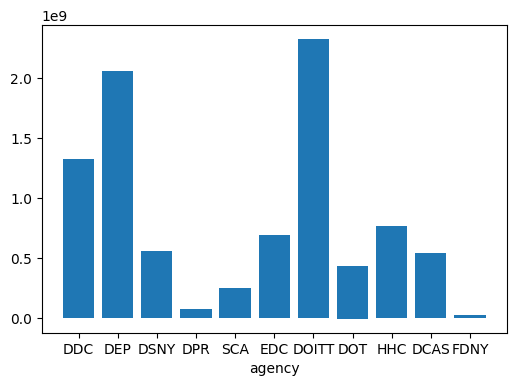

In [247]:
plt.figure(figsize=(6,4))
plt.bar(x = df['Managing Agency'], height = df['Budget Forecast'])
plt.xlabel('agency')
plt.show()

In [248]:
df['Current Phase'].unique()

array(['Design', 'Construction', 'Construction Procurement', nan, 'IT',
       'Close-Out'], dtype=object)

# Extracting no. of days from two given features

In [249]:
d1 = list(df['Design Start'])[0]
d2 = list(df['Forecast Completion'])[0]
d1 = datetime.strptime(d1, '%m/%d/%Y')
d2 = datetime.strptime(d2, '%m/%d/%Y')
(d2 - d1).days


def count_days(d1, d2):
    d1 = datetime.strptime(d1, '%m/%d/%Y')
    d2 = datetime.strptime(d2, '%m/%d/%Y')
    return abs((d2 - d1).days)

In [250]:
days = []

for index, row in new_df.iterrows():
    date = count_days(row['Design Start'] ,row['Forecast Completion'])
    days.append(date)
    
print(days[0:10])

[2597, 3032, 3103, 3512, 2666, 3722, 3072, 3269, 3315, 1787]


In [251]:
new_df['Estimated Days'] = days
new_df.head()

,Description,Category,Managing Agency,Current Phase,Design Start,Budget Forecast,Total Budget Changes,Forecast Completion,Total Schedule Changes,Estimated Days
4,GREEN INFRASTRUCTURE IN OH-015 GRAVESEND BAY C...,Streets and Roadways,DDC,Construction Procurement,10/30/2017,55026000.0,13699000.0,12/09/2024,29.0,2597
5,GREEN INFRASTRUCTURE IN OH-015 GRAVESEND BAY C...,Streets and Roadways,DDC,Design,08/01/2017,49132000.0,-372000.0,11/19/2025,189.0,3032
6,GREEN INFRASTRUCTURE IN OWLS HEAD TRIBUTARY DR...,Streets and Roadways,DDC,Design,01/02/2019,60387000.0,24278000.0,07/02/2027,396.0,3103
7,Reconstruction of Gateway Estates Area (Nehemi...,Streets and Roadways,DDC,Construction,11/17/2013,73572000.0,38077000.0,06/30/2023,584.0,3512
9,"HWQ100SBB, Woodhaven Blvd – SBS – Phase B, cal...",Streets and Roadways,DDC,Design,07/12/2021,50718000.0,-20000.0,10/29/2028,15.0,2666


In [253]:
new_df.to_csv('Second Def dataset')

In [254]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

In [255]:
new_df.drop(columns=['Managing Agency', 'Design Start', 'Forecast Completion'], inplace=True)

In [256]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [257]:
doc = nlp(list(new_df['Description'])[4])

In [258]:
doc = nlp('Comprehensive modernization of existing end-of-life DataShare and DataBridge platforms to guarantee DoITT can maintain ongoing support, evolution, and growth of the DoITT agency-integration and data-sharing eco-system')
filtered_text = ' '.join(token.text for token in doc if not (token.is_stop or token.is_punct))

print(filtered_text)

Comprehensive modernization existing end life DataShare DataBridge platforms guarantee DoITT maintain ongoing support evolution growth DoITT agency integration data sharing eco system


# Preprocessing and Generating word embeddings for 'description' column

In [259]:
def remove_punct_stop(description):
    doc = nlp(description)
    for token in doc:
        filtered_text = ' '.join(token.text for token in doc if not (token.is_stop or token.is_punct))

    return filtered_text

In [260]:
new_df['processed_desc'] = new_df['Description'].apply(remove_punct_stop)

In [261]:
new_df.head()

,Description,Category,Current Phase,Budget Forecast,Total Budget Changes,Total Schedule Changes,Estimated Days,processed_desc
4,GREEN INFRASTRUCTURE IN OH-015 GRAVESEND BAY C...,Streets and Roadways,Construction Procurement,55026000.0,13699000.0,29.0,2597,GREEN INFRASTRUCTURE OH-015 GRAVESEND BAY CSO ...
5,GREEN INFRASTRUCTURE IN OH-015 GRAVESEND BAY C...,Streets and Roadways,Design,49132000.0,-372000.0,189.0,3032,GREEN INFRASTRUCTURE OH-015 GRAVESEND BAY CSO ...
6,GREEN INFRASTRUCTURE IN OWLS HEAD TRIBUTARY DR...,Streets and Roadways,Design,60387000.0,24278000.0,396.0,3103,GREEN INFRASTRUCTURE OWLS HEAD TRIBUTARY DRAIN...
7,Reconstruction of Gateway Estates Area (Nehemi...,Streets and Roadways,Construction,73572000.0,38077000.0,584.0,3512,Reconstruction Gateway Estates Area Nehemiah C...
9,"HWQ100SBB, Woodhaven Blvd – SBS – Phase B, cal...",Streets and Roadways,Design,50718000.0,-20000.0,15.0,2666,HWQ100SBB Woodhaven Blvd SBS Phase B calls cap...


In [262]:
print(list(new_df['Description'][14:15]))
print()
print(list(new_df['processed_desc'][14:15]))

['Implementation of coastal resiliency measures to protect Battery Park and adjacent upland neighborhoods from storm surges and sea level rise.']

['Implementation coastal resiliency measures protect Battery Park adjacent upland neighborhoods storm surges sea level rise']


In [263]:
new_df.drop(columns='Description', inplace=True)
new_df.to_csv('Second Def dataset')

In [264]:
sentence_embeddings = []

for sentence in new_df["processed_desc"]:
    doc = nlp(sentence)
    sentence_mean_embedding = doc.vector.mean()
    sentence_embeddings.append(sentence_mean_embedding)
    
print((sentence_embeddings[0:10]))

[-0.005843391, -0.0056612915, 0.00083714974, -0.019327475, -0.013783839, -0.029599085, -0.015581056, -0.017423637, -0.0072393673, -0.017403992]


In [265]:
print(len(sentence_embeddings), len(new_df['processed_desc']))

2188 2188


In [266]:
new_df.drop(columns=['processed_desc'], inplace=True)
new_df.to_csv('Second Def dataset')

In [267]:
new_df['new_desc'] = sentence_embeddings
new_df.head()
new_df.drop(columns=['Category'], inplace=True)

In [268]:
new_df.to_csv('Second Def dataset')

In [269]:
new_df.drop(columns=['Current Phase'], inplace=True)

In [270]:
x = new_df.drop(columns = 'Budget Forecast')
y = new_df['Budget Forecast']

print(x.shape), print(y.shape)

(2188, 4)
(2188,)


(None, None)

In [271]:
y = np.reshape(y, (-1,1))
print(y.shape)

(2188, 1)


In [272]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=104, 
                                   test_size=0.3, 
                                   shuffle=True)

In [273]:
X_test

,Total Budget Changes,Total Schedule Changes,Estimated Days,new_desc
408,502287.00,-30.0,2288,-0.021868
426,0.00,-366.0,1002,0.030496
906,9642889.68,1517.0,2600,-0.021591
2616,6379885.00,730.0,1316,-0.031922
1133,4449000.00,-1.0,2387,-0.018061
...,...,...,...,...
1398,-709000.00,123.0,2607,-0.015142
2571,0.00,639.0,1978,-0.018913
911,10338071.57,1934.0,3819,-0.013881
1648,33489860.26,1147.0,2436,-0.012994


# Importing models

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from xgboost import XGBRegressor

lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3, leaf_size=30)
dt = DecisionTreeRegressor(min_samples_leaf=3)
svr = SVR(degree=3, kernel='rbf', gamma='auto', epsilon=0.3)
rf = RandomForestRegressor(n_estimators=150)
abr = AdaBoostRegressor(n_estimators=50, random_state=2)
xgb = XGBRegressor(n_estimators=150)
etr = ExtraTreesRegressor(n_estimators=60, random_state=2)

In [275]:
models = [lr, knn, dt, svr, rf, xgb, etr, abr]
data = []
algos = ['LR' , 'KNN', 'DT', 'SVR', 'RF', 'XGB', 'ETR', 'ABR']
i = 0

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    data.append([algos[i], mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False)])
    i+=1

    
accuracy = pd.DataFrame(data, columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])


# Table for MAE, MSE, R2 for respective algorithms

In [276]:
accuracy.sort_values(by='R2', ascending=0)

,Model,MSE,MAE,R2,RMSE
5,XGB,1.043757e+15,1.465922e+07,0.969215,3.230723e+07
4,RF,1.704169e+15,1.767061e+07,0.949737,4.128158e+07
6,ETR,1.935259e+15,1.623677e+07,0.942921,4.399158e+07
1,KNN,2.412690e+15,1.949803e+07,0.928839,4.911915e+07
2,DT,3.520879e+15,2.148121e+07,0.896154,5.933699e+07
7,ABR,1.246813e+16,9.818166e+07,0.632260,1.116608e+08
0,LR,2.532633e+16,8.415917e+07,0.253016,1.591425e+08
3,SVR,3.690014e+16,7.665034e+07,-0.088347,1.920941e+08


In [277]:
import pickle
with open('etr.pkl', 'wb') as file:
    pickle.dump(etr, file)

In [286]:
pred = pd.DataFrame(etr.predict(X_test))
pred = pd.concat([pred, pd.DataFrame(y_test)], axis=1)
pred

,0,0
0,1.334408e+08,5.521456e+07
1,3.559092e+07,2.631843e+07
2,2.608642e+08,2.442695e+08
3,5.986958e+07,5.052466e+07
4,3.599550e+07,3.569600e+07
...,...,...
652,4.293926e+07,3.415800e+07
653,8.915293e+07,6.042240e+07
654,5.858082e+07,6.731109e+07
655,1.306361e+08,1.265857e+08


In [279]:
import locale

# Set the locale to your system's default (or a specific locale if needed)
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Your number
number = 1000000

# Format the number as currency with commas
formatted_number = locale.currency(number, grouping=True)

print(formatted_number)


$1,000,000.00


In [280]:
pred.rename(columns={0: 'actual'})

,actual,actual
0,1.334408e+08,5.521456e+07
1,3.559092e+07,2.631843e+07
2,2.608642e+08,2.442695e+08
3,5.986958e+07,5.052466e+07
4,3.599550e+07,3.569600e+07
...,...,...
652,4.293926e+07,3.415800e+07
653,8.915293e+07,6.042240e+07
654,5.858082e+07,6.731109e+07
655,1.306361e+08,1.265857e+08


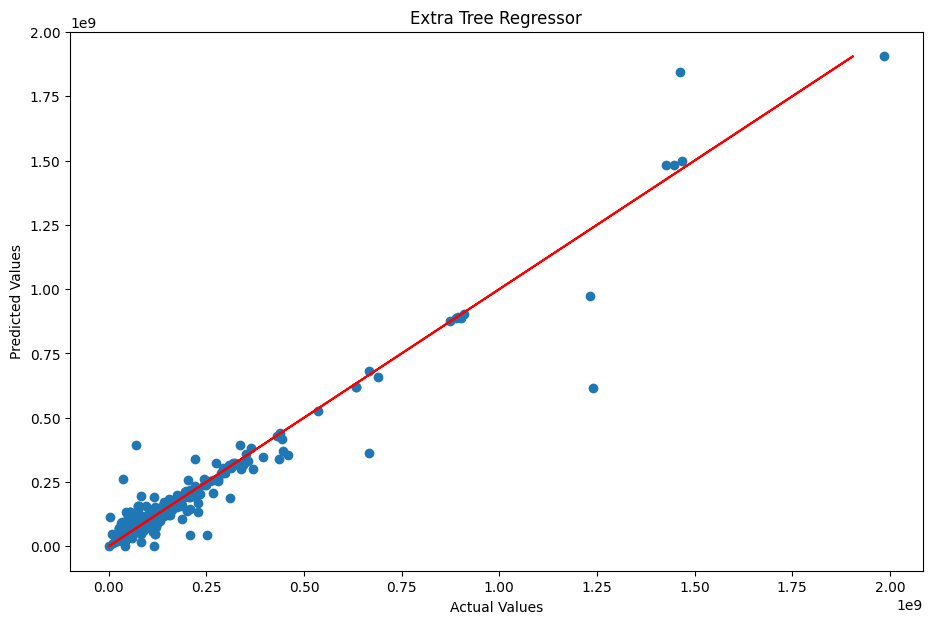

In [281]:
import matplotlib.pyplot as plt
actual_values = etr.predict(X_test)
plt.figure(figsize=(11,7))
plt.scatter(y_test, actual_values)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot(actual_values, actual_values, color='red', label='Perfect Prediction')
plt.title('Extra Tree Regressor')
plt.show()

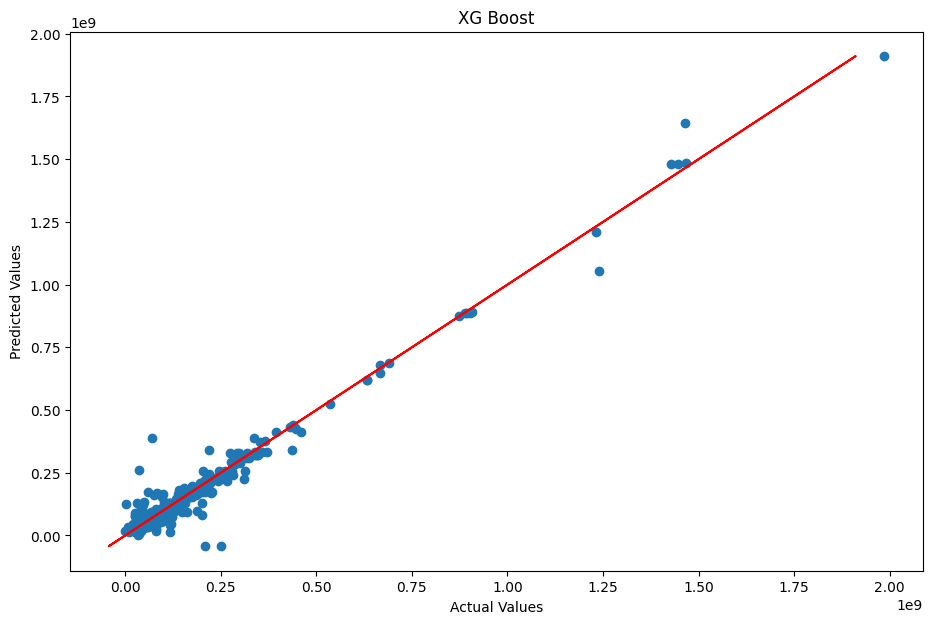

In [282]:
actual_values = xgb.predict(X_test)
plt.figure(figsize=(11,7))
plt.scatter(y_test, actual_values)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot(actual_values, actual_values, color='red', label='Perfect Prediction')
plt.title('XG Boost')
plt.show()

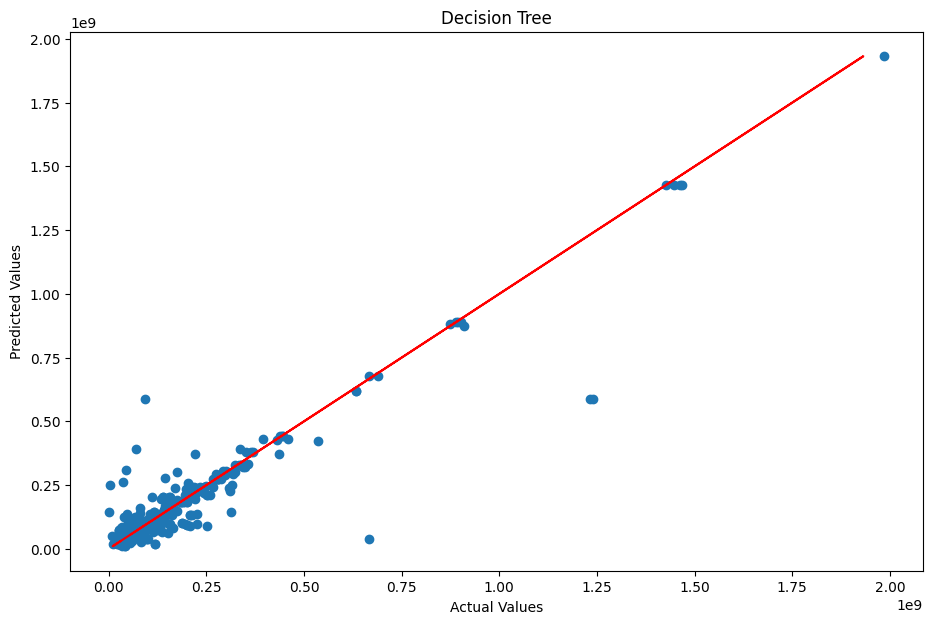

In [283]:
actual_values = dt.predict(X_test)
plt.figure(figsize=(11,7))
plt.scatter(y_test, actual_values)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot(actual_values, actual_values, color='red', label='Perfect Prediction')
plt.title('Decision Tree')
plt.show()

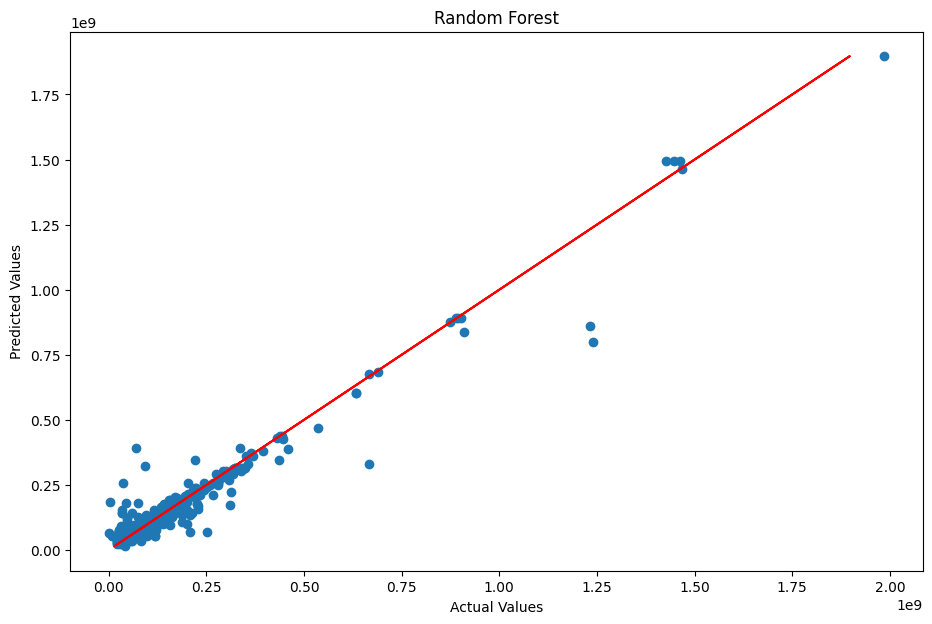

In [284]:
actual_values = rf.predict(X_test)
plt.figure(figsize=(11,7))
plt.scatter(y_test, actual_values)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot(actual_values, actual_values, color='red', label='Perfect Prediction')
plt.title('Random Forest')
plt.show()

In [285]:
list(df['Description'])[8:28]

[nan,
 'HWQ100SBB, Woodhaven Blvd – SBS – Phase B, calls for capital improvements along Woodhaven Blvd between Union Turnpike and 107th Avenue in the borough of Queens. These improvements include but are not limited to median widening, building out neck downs, normalizing intersections and other features to increase safety and support the Woodhaven SBS.',
 'Empire Boulevard Safety Improvements',
 'The main scope of this project is to construct a new Administration and Personnel Building at the northwest corner, limiting relocation and operational disruptions during construction as wells as to accommodate future growth.',
 'Reconstruction at 108 Street Pumping Station',
 'Reconstruction of Clearview Pump Station',
 'Rehabilitation of the Queens 8/10/12 Garage located at Bergen Landing  at 130-23 150th Avenue Queens',
 'This project will reconstruct the entrances, paths, plaza and drainage infrastructure at Fort Greene Park.',
 'NEW SCHOOL / DEMOLITION OF EXISTING X163 BUILDING',
 'ADDIT